# STEP 1:                    EXPLORATORY DATA ANALYSIS 

# Step a:
#loading the libraries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Step b:
#using pandas reference object to read the csv file using read_csv()

In [2]:
df = pd.read_csv("C:\\Users\\USER\\Desktop\\grip\\Iris.csv")

# Step c:
#displaying the first 5 rows using the built in function .head()

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Step d:
#since there are ambiguity between the two indexes, the index is reset to Id from the dataframe using .set_index() and the parameter inplace is set to true so that, it wouldnt change while we rerun this dataframe else where in this notebook.

In [4]:
df.set_index(['Id'],inplace=True)

In [7]:
#df.head()

# Step e:
visualize the columns using matplotlib.pyplot and seaborn and gain the relation between each columns 

In [8]:
import seaborn as sns

<Figure size 432x432 with 0 Axes>

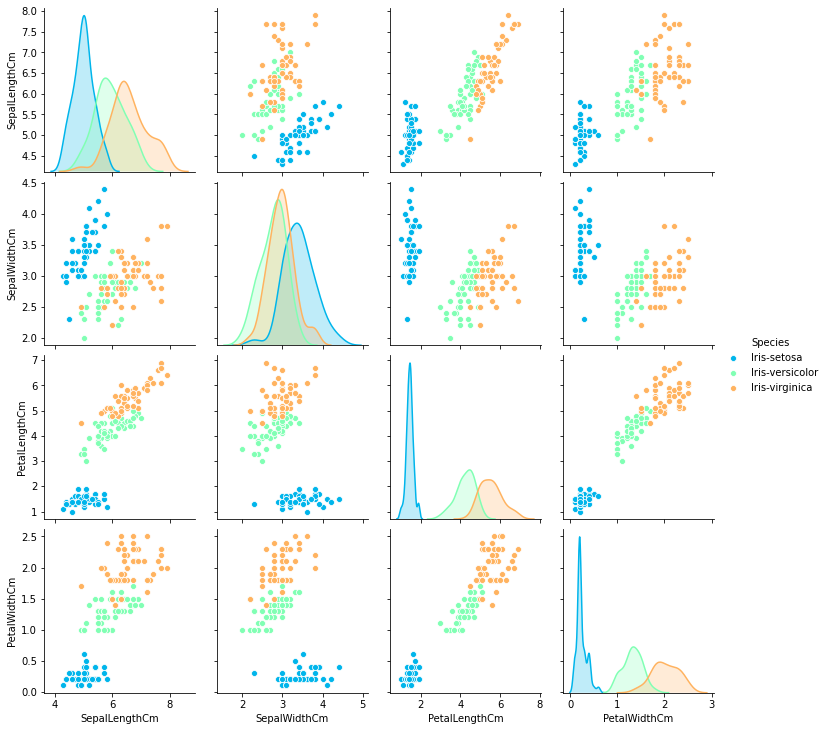

In [19]:
plt.figure(figsize=(6,6))

sns.pairplot(df,hue='Species',palette='rainbow')

#sepal(l) + sepal(w) is almost the same in iris-versicolor and iris-virginica but for iris-setosa it is totally different.
#sepal(l) + petal(l) is totally different for all the categories as it forms a separate clusters.
#sepal(l) + petal(w) doesnt fully co-incide  for iris-versicolor and iris-virginica but for few data points. But iris-setosa is totally different as it forms the separate clusters.
#sepal(w) + petal(l) does merge with each other but it isn't same for iris-versicolor and iris-virginica but for iris-setosa it is totally different as the cluster is far away from the two.
#sepal(w) + petal(w) coincides a little for iris-versicolor and iris-virginica. But has a separate group for setosa
#petal(l) + petal(w) has almost the similar values for iris-setosa as it's cluster is small. Iris-virginica and Iris-versicolor has fewer data points that are similar to each other

# Box Plot 
#it is used to understand the presence of an outliers and quartile ranges in the categorical features of the dataset

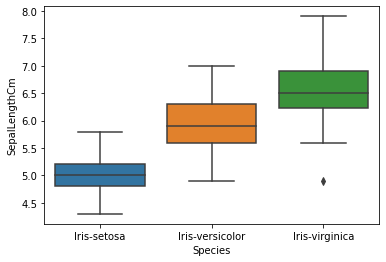

In [21]:
sns.boxplot(x=df['Species'],y=df['SepalLengthCm'],data=df)

#In the above figure it is seen that, Iris-virginica has single outlier in sepal-length deducted by the boxplot in seaborn 

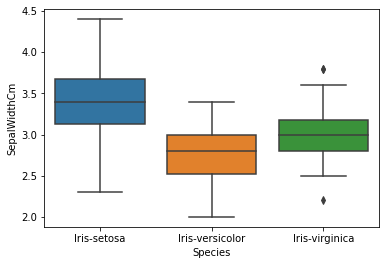

In [22]:
sns.boxplot(x=df['Species'],y=df['SepalWidthCm'],data=df)

#In the above figure, It is seen that, Iris-virginica has 2 outliers in sepal-width

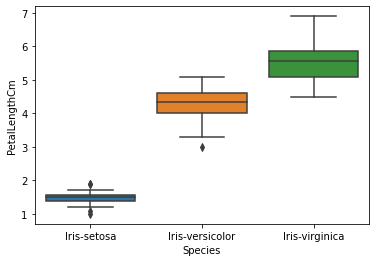

In [23]:
sns.boxplot(x=df['Species'],y=df['PetalLengthCm'],data=df)

#In the above figure it is seen that, Iris-setosa and Iris-versicolor has outliers in petal-length

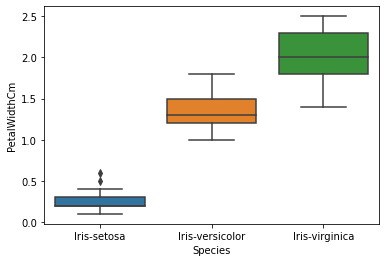

In [24]:
sns.boxplot(x=df['Species'],y=df['PetalWidthCm'],data=df)

#In the above figure, It is seen that, Iris-setosa has the outlier in petal-width.

# Step 3:
Apply unsupervised machine learning algorithm

In [43]:
x = df.iloc[:,[0,1,2,3]].values

In [56]:
len(x)

150

In [42]:
from sklearn.cluster import KMeans

#finding the number of clusters necessary for an unsupervised machine learning algorithm

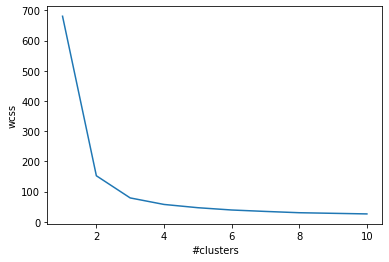

In [47]:
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_) #convex and isotropic
plt.plot(range(1,11),wcss)
plt.xlabel("#clusters")
plt.ylabel("wcss") #within cluster sum of squares.
plt.show()

#the suitable number of clusters to be used for this unsupervised machine learning algorithm is 3 since the elbow shape appears to be between 2 and 4. By taking its average , it is (4+2)/2 = 3

In [48]:
kmeans = KMeans(n_clusters=3,max_iter=300,n_init=10,init='k-means++',random_state=0)

#the fit_predict is used as an alternate of fit + predict instead of doing it in 2 steps. It is done at the single step

In [49]:
y_predicted_means = kmeans.fit_predict(x)

In [50]:
y_predicted_means

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [57]:
len(y_predicted_means)

150

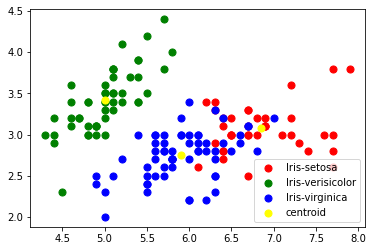

In [58]:
plt.scatter(x[y_predicted_means==0,0],x[y_predicted_means==0,1],s=50,c='red',label='Iris-setosa')
plt.scatter(x[y_predicted_means==1,0],x[y_predicted_means==1,1],s=50,c='green',label='Iris-verisicolor')
plt.scatter(x[y_predicted_means==2,0],x[y_predicted_means==2,1],s=50,c='blue',label='Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=50,c='yellow',label='centroid')
plt.legend()

#the scatter plots are used pair wise (0,0),(0,1),(1,0),(1,1),(2,0),(2,1) . The paramter s is the size of the dots in scatter plot, c is the color used to represent the clusters 